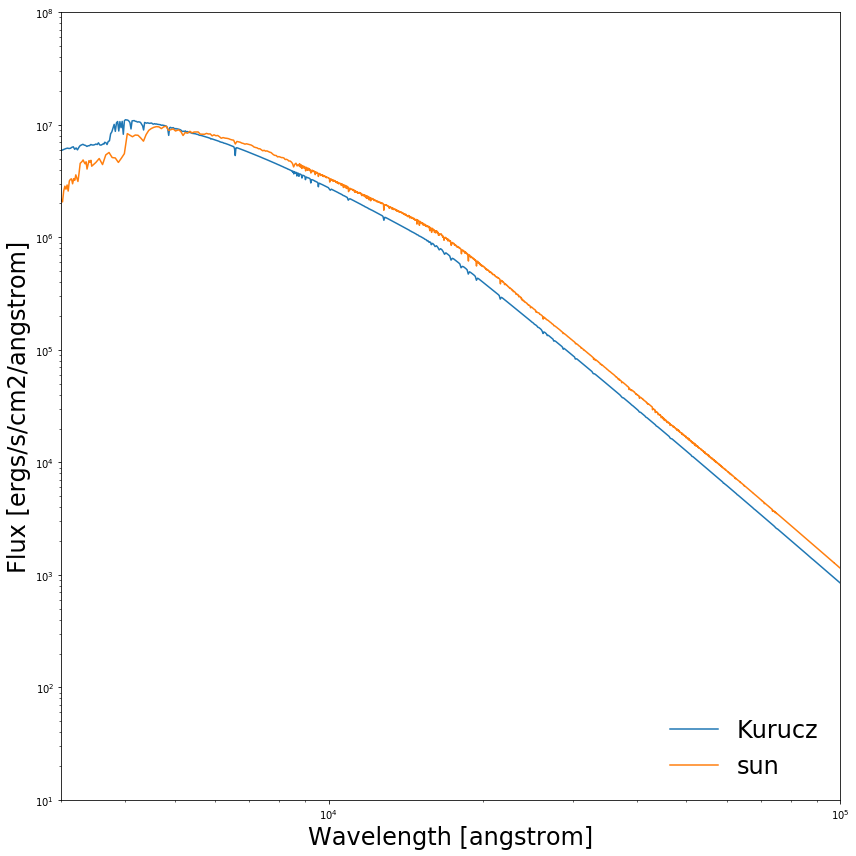

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from pystellibs import Kurucz
from astropy.io import fits as pyfits
import astropy.constants as c

### 导入lib下面的某一个数据库，我这里是为了得到波长的分辨率，所以需要load
f=pyfits.open('kurucz2004.grid.fits')
wavelength=f[0].data[-1]
kurucz = Kurucz()
ap = (3.8, 3.5, 0, 0.02) #分别为恒星log teff，log g, log L/L_sun, Z/Z_sun
sk = kurucz.generate_stellar_spectrum(*ap)

### 把太阳光谱观测数据导入，并单位转化成 [ergs/s/cm2/angstrom]，这是接收的光子
sun_data=np.loadtxt('Sun_org.dat',skiprows=2)
const=c.h.value*c.c.value*1e7*(c.au.value/c.R_sun.value)**2
energy=[]
for i in range(0,len(sun_data)):
    energy.append(sun_data[i,2]/1e4*const/(sun_data[i,0]*1e-6)/1e1)
#print(energy)


plt.figure(figsize=(12,12))
plt.loglog(wavelength, sk/(4*np.pi*(c.R_sun.value*1e2)**2), label='Kurucz')
plt.loglog(sun_data[:,0]*1e4,energy, label='sun')
plt.legend(frameon=False, loc='lower right',fontsize=24)
plt.xlabel("Wavelength [angstrom]",fontsize=24)
plt.ylabel("Flux [ergs/s/cm2/angstrom]",fontsize=24)
plt.xlim(0.3e4, 10e4)
plt.ylim(1e1, 1e8)
plt.tight_layout()
plt.savefig("sun_ATLAS9_model.png",dpi=300)